In [48]:
import torch
import torch.nn as nn
import numpy as np
import torch.nn.functional as F
from random import randint
import utils
import time
from IPython.core.debugger import set_trace
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# 1. Basics (labs_lecture02)

In [2]:
import torch
import numpy as np

## 1.1 Tensor Initialization


#### 1.1.1 Init from NP array
+ torch.Tensor()**
+ torch.tensor()
+ torch.as_tensor()**
+ torch.from_numpy()

In [3]:
# How to initialize a tensor from a numpy array?
data = np.array([1,2,3]); print(f"np array: {data}")
print(f"PyTorch default dtype: ", torch.get_default_dtype())

t1 = torch.Tensor(data) # torch.get_default_dtype()
t2 = torch.tensor(data) # dtype=torch.float32 # will infer dtype
t3 = torch.as_tensor(data) # preferred over from_numpy #int32
t4 = torch.from_numpy(data) #int32
print(f"torch.Tensor: {t1.dtype}")
print(f"torch.tensor (will infer dtype): {t2.dtype}")
print(f"torch.as_tensor (preferred over from_numpy): {t3.dtype}")

np array: [1 2 3]
PyTorch default dtype:  torch.float32
torch.Tensor: torch.float32
torch.tensor (will infer dtype): torch.int32
torch.as_tensor (preferred over from_numpy): torch.int32


#### 1.1.2 One/ Random/ Zero/ Identity Tensor

In [4]:
one_t = torch.ones([2,5,7]); print(f"ones: \n{one_t}")
rand_t = torch.rand(2,3,4); print(f"rand: \n{rand_t}")
zero_t = torch.zeros(2,3,4); print(f"zeros: \n{zero_t}")
eye_t = torch.eye(3); print(f"eye: \n{eye_t}")

ones: 
tensor([[[1., 1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1., 1.]],

        [[1., 1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1., 1., 1.]]])
rand: 
tensor([[[0.9386, 0.2913, 0.5683, 0.3265],
         [0.7941, 0.7810, 0.1085, 0.5685],
         [0.7763, 0.7742, 0.9672, 0.8134]],

        [[0.2231, 0.0455, 0.9902, 0.0298],
         [0.4345, 0.5753, 0.8725, 0.6663],
         [0.7364, 0.6649, 0.1743, 0.1006]]])
zeros: 
tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]])
eye: 
tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])


#### 1.1.3 Long Tensor (Integers)

In [5]:
# integer tensor MUST HAVE BRACKETS
int_t1 = torch.LongTensor([1,1]); print(f"LongTensor: \t\t\t{int_t1}")
int_t2 = torch.tensor([2,2], dtype=torch.int32) ; print(f"tensor(dtype=torch.int32): \t{int_t2}")
int_t3 = torch.tensor([3,3]).long(); print(f".long(): \t\t\t{int_t3}")

LongTensor: 			tensor([1, 1])
tensor(dtype=torch.int32): 	tensor([2, 2], dtype=torch.int32)
.long(): 			tensor([3, 3])


#### 1.1.4 Various Tensor Functions
+ .shape, .size()
+ .dim()
+ .type()
+ .view(), .reshape()
+ .arange(n), .randperm(n)
+ .item()

In [6]:
print_t = torch.rand([2,3,4])
print(f"Shape: {print_t.shape} and size: {print_t.size()}")
print(f"Dimension of Tensor: {print_t.dim()}")
print(f"Len: {len(print_t)} == size(0): {print_t.size(0)}")

Shape: torch.Size([2, 3, 4]) and size: torch.Size([2, 3, 4])
Dimension of Tensor: 3
Len: 2 == size(0): 2


In [7]:
print(f"view: {print_t.view(3,8)}") 
print(f"reshape: {print_t.reshape(-1, 6)}")
print(f"print_t is not modified until assigned: \n{print_t}")

view: tensor([[0.8736, 0.9272, 0.2867, 0.0137, 0.8079, 0.4144, 0.7501, 0.5015],
        [0.0981, 0.2036, 0.1065, 0.9184, 0.6479, 0.4465, 0.0202, 0.7625],
        [0.5634, 0.7148, 0.9397, 0.9406, 0.7385, 0.0013, 0.7810, 0.1178]])
reshape: tensor([[0.8736, 0.9272, 0.2867, 0.0137, 0.8079, 0.4144],
        [0.7501, 0.5015, 0.0981, 0.2036, 0.1065, 0.9184],
        [0.6479, 0.4465, 0.0202, 0.7625, 0.5634, 0.7148],
        [0.9397, 0.9406, 0.7385, 0.0013, 0.7810, 0.1178]])
print_t is not modified until assigned: 
tensor([[[0.8736, 0.9272, 0.2867, 0.0137],
         [0.8079, 0.4144, 0.7501, 0.5015],
         [0.0981, 0.2036, 0.1065, 0.9184]],

        [[0.6479, 0.4465, 0.0202, 0.7625],
         [0.5634, 0.7148, 0.9397, 0.9406],
         [0.7385, 0.0013, 0.7810, 0.1178]]])


In [8]:
ar_t = torch.arange(10); print(f"arange(n): {ar_t}") # ordered 0 to 9
randp_t = torch.randperm(10); print(f"randperm(n): {randp_t}") # random 0 to 9

arange(n): tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
randperm(n): tensor([7, 9, 1, 2, 3, 6, 4, 8, 5, 0])


## 1.2 Slicing of Tensor

In [9]:
A = torch.rand(10,2)
v = A[2] # third row
B = A[:5] # first 5 rows (0-4)
x = A[0,0].item() # 0-dimensional tensor is a scalar => item()
print(A, v)
print(B, x)

tensor([[0.4363, 0.2435],
        [0.6115, 0.4986],
        [0.3567, 0.1293],
        [0.2628, 0.9161],
        [0.0171, 0.1287],
        [0.0773, 0.2926],
        [0.7199, 0.6397],
        [0.8149, 0.2726],
        [0.5656, 0.5329],
        [0.2535, 0.5138]]) tensor([0.3567, 0.1293])
tensor([[0.4363, 0.2435],
        [0.6115, 0.4986],
        [0.3567, 0.1293],
        [0.2628, 0.9161],
        [0.0171, 0.1287]]) 0.4362950921058655


In [10]:
labels = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship','Truck']
label_idx = dict(zip(range(len(labels)), labels))
print(label_idx)
print(labels[1:1+5]) # 1:6 exclusive

{0: 'Airplane', 1: 'Automobile', 2: 'Bird', 3: 'Cat', 4: 'Deer', 5: 'Dog', 6: 'Frog', 7: 'Horse', 8: 'Ship', 9: 'Truck'}
['Automobile', 'Bird', 'Cat', 'Deer', 'Dog']


## 1.3 Additional

In [11]:
# list slicing
some_list = list(range(6)); print(f"Ori: \t\t{some_list}")
all_list = some_list[:]; print(f"[:]: \t\t{all_list}")
sliced_list = some_list[1:4]; print(f"[1:4]: \t\t{sliced_list}") # first inclusive, last exclusive
sliced_list = some_list[1:]; print(f"[1:]: \t\t{sliced_list}") # first inclusive
sliced_list = some_list[:4]; print(f"[:4]: \t\t{sliced_list}") # last exclusive
sliced_list = some_list[:-1]; print(f"[:-1]: \t\t{sliced_list}") # last exclusive
sliced_list = some_list[1:4:2]; print(f"[1:4:2]:\t{sliced_list}") # last exclusive

Ori: 		[0, 1, 2, 3, 4, 5]
[:]: 		[0, 1, 2, 3, 4, 5]
[1:4]: 		[1, 2, 3]
[1:]: 		[1, 2, 3, 4, 5]
[:4]: 		[0, 1, 2, 3]
[:-1]: 		[0, 1, 2, 3, 4]
[1:4:2]:	[1, 3]


In [12]:
# tensor slicing
points = torch.tensor([[4.0, 1.0], [5.0, 3.0], [2.0, 1.0]]); print(f"Ori \t{points}\n")
sliced_points = points[1:]; print(f"[1:] \t{sliced_points}\n")     # all rows after first; all columns (implicit)
sliced_points = points[1:,:]; print(f"[1:,:] \t{sliced_points}\n") # all rows after first; all columns
sliced_points = points[1:,0]; print(f"[1:,0] \t{sliced_points}\n") # all rows after first; first column
sliced_points = points[2,0]; print(f"[2,0] \t{sliced_points}\n") # 
sliced_points = points[None]; print(f"[None] \t{sliced_points}\n") # adds a dim of size 1, like unsqueeze

Ori 	tensor([[4., 1.],
        [5., 3.],
        [2., 1.]])

[1:] 	tensor([[5., 3.],
        [2., 1.]])

[1:,:] 	tensor([[5., 3.],
        [2., 1.]])

[1:,0] 	tensor([5., 2.])

[2,0] 	2.0

[None] 	tensor([[[4., 1.],
         [5., 3.],
         [2., 1.]]])



In [13]:
x = torch.Tensor([[1,2,3],[6,5,4]]); print(f"{x} {x.shape}\n")
# find max in each rows
max_value, max_idx = torch.max(x, dim=1)
print(f"torch.max(): \t{max_value}, {max_idx}")
# find sum across rows
sum_x = torch.sum(x, dim=1)
print(f"torch.sum(): \t{sum_x}\n")
y = torch.randn(2, 3)
z = x + y; print(z)
x.add_(y); print(x) #auto add inplace

tensor([[1., 2., 3.],
        [6., 5., 4.]]) torch.Size([2, 3])

torch.max(): 	tensor([3., 6.]), tensor([2, 0])
torch.sum(): 	tensor([ 6., 15.])

tensor([[1.1388, 1.9611, 2.9511],
        [6.2722, 5.1869, 4.5364]])
tensor([[1.1388, 1.9611, 2.9511],
        [6.2722, 5.1869, 4.5364]])


In [14]:
x.numel()

6

In [15]:
a = torch.ones(3, 2)
a_t = torch.transpose(a, 0, 1)
a_t2 = a.transpose(0, 1) #same!
a_t3 = a.t()
print(a, a.size())
print(a_t, a_t.size())
print(a_t2, a_t2.size())
print(a_t3, a_t3.size())
print(a)

tensor([[1., 1.],
        [1., 1.],
        [1., 1.]]) torch.Size([3, 2])
tensor([[1., 1., 1.],
        [1., 1., 1.]]) torch.Size([2, 3])
tensor([[1., 1., 1.],
        [1., 1., 1.]]) torch.Size([2, 3])
tensor([[1., 1., 1.],
        [1., 1., 1.]]) torch.Size([2, 3])
tensor([[1., 1.],
        [1., 1.],
        [1., 1.]])


In [16]:
W = torch.LongTensor([[1,1,1,1,1],[0,5,0,5,0],[2,2,2,2,2]]); print(W)
print(W.T)
print(W.t())

tensor([[1, 1, 1, 1, 1],
        [0, 5, 0, 5, 0],
        [2, 2, 2, 2, 2]])
tensor([[1, 0, 2],
        [1, 5, 2],
        [1, 0, 2],
        [1, 5, 2],
        [1, 0, 2]])
tensor([[1, 0, 2],
        [1, 5, 2],
        [1, 0, 2],
        [1, 5, 2],
        [1, 0, 2]])


In [17]:
x = torch.Tensor([1,1,2]); print(x)
y = torch.Tensor([1,2,3]); print(y)
z = torch.matmul(x, y); print(z) #matmul works for vectors, mm doesn't

tensor([1., 1., 2.])
tensor([1., 2., 3.])
tensor(9.)


$ Wx + b = \begin{bmatrix}1&2&3\\ 4&5&6\end{bmatrix}\begin{bmatrix}1\\ -2\:\\ \:2\end{bmatrix} + \begin{bmatrix}7\\ 10\end{bmatrix} = \begin{bmatrix}10\\ 16\end{bmatrix}$

In [18]:
W = torch.LongTensor([[1,2,3],[4,5,6]]); print(f"W: {W.shape}")
x = torch.LongTensor([1,-2,2]); print(f"x: {x.shape}")
b = torch.LongTensor([7, 10]); print(f"b: {b.shape}")
z = torch.matmul(W,x)+b
print(f"z: {z} {z.shape}")

W: torch.Size([2, 3])
x: torch.Size([3])
b: torch.Size([2])
z: tensor([10, 16]) torch.Size([2])


$ \begin{bmatrix}1&1&1\\ 2&3&0\end{bmatrix}\begin{bmatrix}1&2&1&1\\ 2&0&1&1\\ 3&2&1&1\end{bmatrix} = \begin{bmatrix}6&4&3&3\\ 8&4&5&5\end{bmatrix}$

In [19]:
A = torch.LongTensor([[1,1,1],[2,3,0]])
B = torch.LongTensor([[1,2,1,1],[2,0,1,1],[3,2,1,1]])
C = torch.mm(A,B)
D = torch.matmul(A,B)
print(C)
print(D)

tensor([[6, 4, 3, 3],
        [8, 4, 5, 5]])
tensor([[6, 4, 3, 3],
        [8, 4, 5, 5]])


Outer Product:

$ \begin{bmatrix}1\\ 2\\ 3\end{bmatrix}\begin{bmatrix}0&1&2\end{bmatrix} = \begin{bmatrix}0&1&2\\ 0&2&4\\ 0&3&6\end{bmatrix} $

In [20]:
# outer product
x = torch.LongTensor([1,2,3]); print(x.shape)
x = x.unsqueeze(1); print(x.shape) #3x1
y = torch.LongTensor([0,1,2]); print(y.shape) #1x3
outerpdt = x * y #3x3
print(outerpdt)

torch.Size([3])
torch.Size([3, 1])
torch.Size([3])
tensor([[0, 1, 2],
        [0, 2, 4],
        [0, 3, 6]])


In [21]:
A = torch.LongTensor([[1,1,1,1,1,1],[0,0,2,2,0,1],[1,2,3,0,0,0]])
B = torch.LongTensor([[0,0],[0,1],[0,0],[1,1],[2,0],[3,1]])
C = torch.mm(A,B)
print(C)

tensor([[6, 3],
        [5, 3],
        [0, 2]])


# 2. Linear & Vanilla NN (labs_lecture03)

In [22]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from random import randint

## 2.1 Linear Module
nn.Linear(in_features, out_features, bias=True)

In [23]:
linear_mod = nn.Linear(5, 2)
x = torch.rand(5)
y = linear_mod(x)
print(y)

tensor([0.8377, 0.6598], grad_fn=<AddBackward0>)


In [24]:
print(linear_mod.weight)
print(linear_mod.weight.size())
print(linear_mod.bias)
print(linear_mod.bias.size())
# modify weights
linear_mod.weight[0,1]=1
print(linear_mod.weight)

linear_mod.weight.fill_(1)
print(linear_mod.weight)

Parameter containing:
tensor([[ 0.1580, -0.2642,  0.2019,  0.4015,  0.2768],
        [-0.2873, -0.4209,  0.2980,  0.4032,  0.2973]], requires_grad=True)
torch.Size([2, 5])
Parameter containing:
tensor([0.1829, 0.2066], requires_grad=True)
torch.Size([2])
Parameter containing:
tensor([[ 0.1580,  1.0000,  0.2019,  0.4015,  0.2768],
        [-0.2873, -0.4209,  0.2980,  0.4032,  0.2973]], grad_fn=<CopySlices>)
Parameter containing:
tensor([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]], grad_fn=<FillBackward0>)


## 2.2 Softmax
F.softmax(A, dim=1) 

For matrices, it’s dim=1. For others like vectors, it’s 0. Along the feature dim, not the data dim.

In [25]:
B = torch.Tensor([[1,2,3,4],
                 [1,2,3,5]])
print(B, B.size()) # 2,4
prob = F.softmax(B, dim=1) #rows (2) matrices
print(f"=> Softmax over dim 1 (rows)")
print(prob)
print(prob.sum(1)) 
prob = F.softmax(B, dim=0) #cols (4) vectors
print(f"=> Softmax over dim 0 (cols)")
print(prob)
print(prob.sum(0)) 

tensor([[1., 2., 3., 4.],
        [1., 2., 3., 5.]]) torch.Size([2, 4])
=> Softmax over dim 1 (rows)
tensor([[0.0321, 0.0871, 0.2369, 0.6439],
        [0.0152, 0.0414, 0.1125, 0.8310]])
tensor([1., 1.])
=> Softmax over dim 0 (cols)
tensor([[0.5000, 0.5000, 0.5000, 0.2689],
        [0.5000, 0.5000, 0.5000, 0.7311]])
tensor([1., 1., 1., 1.])


## 2.3 Vanilla NN

In [26]:
class VanillaNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(VanillaNN, self).__init__() #super().__init__()
        self.layer1 = nn.Linear(input_size, hidden_size, bias=True)
        self.layer2 = nn.Linear(hidden_size, output_size, bias=True)
        
    def forward(self, x):
        x = self.layer1(x)
        x = F.relu(x)
        x = self.layer2(x)
        x = F.softmax(x, dim=0) #input is vector
        return x

net = VanillaNN(2,5,3)
print(net)
x = torch.Tensor([1,1]) # vector of size 2
p = net.forward(x)
print(p, p.sum(0))

VanillaNN(
  (layer1): Linear(in_features=2, out_features=5, bias=True)
  (layer2): Linear(in_features=5, out_features=3, bias=True)
)
tensor([0.3146, 0.2705, 0.4148], grad_fn=<SoftmaxBackward>) tensor(1., grad_fn=<SumBackward1>)


In [27]:
list_of_param = list(net.parameters())
print(list_of_param)

[Parameter containing:
tensor([[ 0.3414, -0.1935],
        [-0.2599,  0.6164],
        [ 0.6252,  0.1562],
        [ 0.6215, -0.6219],
        [ 0.5468,  0.0641]], requires_grad=True), Parameter containing:
tensor([ 0.3141, -0.0727, -0.2401,  0.5058, -0.5317], requires_grad=True), Parameter containing:
tensor([[-0.0098, -0.0363, -0.1303, -0.3548, -0.1033],
        [ 0.1464, -0.3004, -0.3069, -0.2275, -0.1467],
        [-0.4368,  0.4121, -0.3758, -0.2263,  0.1439]], requires_grad=True), Parameter containing:
tensor([-0.0370, -0.1505,  0.3579], requires_grad=True)]


## 2.4 Train Vanilla NN

In [28]:
import utils

In [29]:
from utils import check_mnist_dataset_exists
data_path = check_mnist_dataset_exists()
train_data = torch.load(data_path+'mnist/train_data.pt')
train_label = torch.load(data_path+'mnist/train_label.pt')
test_data = torch.load(data_path+'mnist/test_data.pt')
test_label = torch.load(data_path+'mnist/test_label.pt')
print(train_data.size())
print(train_label.size())
print(test_data.size())

torch.Size([60000, 28, 28])
torch.Size([60000])
torch.Size([10000, 28, 28])


### 2.4.1 One Layer Net

In [30]:
class One_Layer_Net(nn.Module):
    def __init__(self, input_size, output_size):
        super(One_Layer_Net, self).__init__()
        self.linear_layer = nn.Linear(input_size,output_size,bias=True)
    def forward(self, x): 
        x = self.linear_layer(x)
        p = F.softmax(x, dim=1)
        return p
    
net = One_Layer_Net(784, 10)
p = net(test_data[6].view(1,784)) # [Batch, InputSize]
print(p)

tensor([[0.1122, 0.1383, 0.1060, 0.1443, 0.0801, 0.0821, 0.0925, 0.0879, 0.0709,
         0.0859]], grad_fn=<SoftmaxBackward>)


### 2.4.2 Train One Layer Net (MNIST) without mini-batch
idx = randint(0,len(train_data)-1) --- [0,59999]

tensor([[1.7454e-04, 2.3683e-04, 4.3307e-04, 1.3266e-02, 8.2033e-01, 3.6935e-02,
         3.9547e-04, 2.0725e-02, 8.5079e-02, 2.2423e-02]],
       grad_fn=<SoftmaxBackward>)


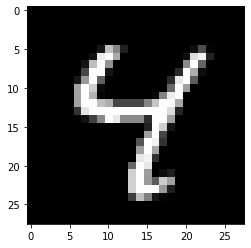

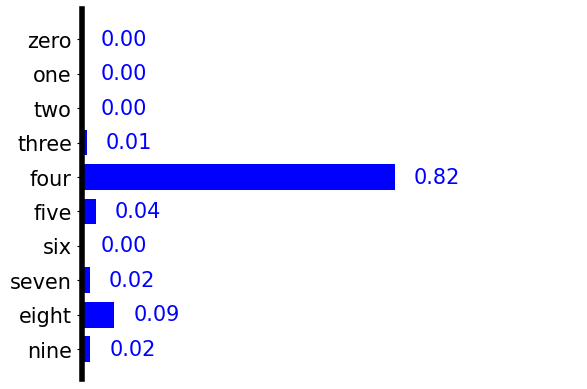

In [31]:
from random import randint # inclusive from and to
criterion = nn.NLLLoss()
optimizer = torch.optim.SGD(net.parameters(), lr=0.01)
for i in range(5000):
    idx = randint(0,len(train_data)-1) # pick one randomly from 60000
    
    inputs = train_data[idx].view(1,784) # [Batch, InputSize]
    labels = train_label[idx].view(1) # make to tensor of size 1
    
    inputs.requires_grad_()
    probs = net(inputs)
    
    log_probs = torch.log(probs)
    loss = criterion(log_probs, labels)    
    optimizer.zero_grad()       
    loss.backward()
    optimizer.step()
    
p = net(test_data[6].view(1,784)) 
print(p)
utils.show(test_data[6])
utils.show_prob_mnist(p)

### 2.4.3 Train One Layer Net (MNIST) with mini-batch
indices=torch.LongTensor(2).random_(0,5) ---- [0,5)

In [32]:
indices=torch.LongTensor(5).random_(0,len(train_data)) ; print(indices)

tensor([18395, 14508, 49437,  6666, 20081])


tensor([[4.5502e-01, 9.2346e-06, 7.1434e-02, 3.8914e-04, 8.2422e-04, 1.2866e-02,
         4.5594e-01, 5.0335e-04, 2.9638e-03, 4.7721e-05]],
       grad_fn=<SoftmaxBackward>)


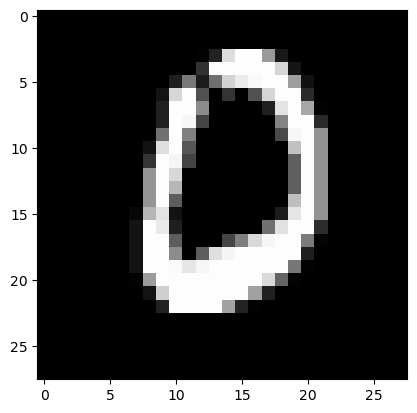

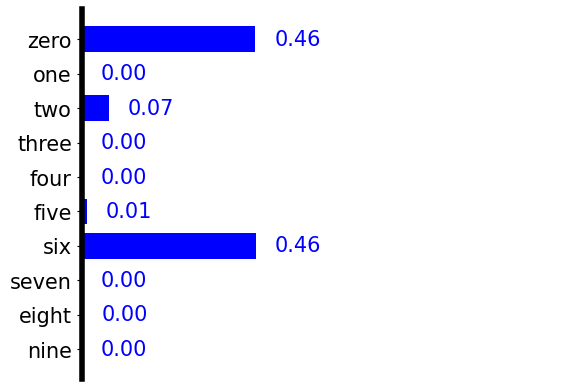

In [33]:
net = One_Layer_Net(784, 10)
criterion = nn.NLLLoss()
optimizer = torch.optim.SGD(net.parameters(), lr=0.01)
bs = 200

for iter in range(1,5000):
    # create a minibatch
    indices=torch.LongTensor(bs).random_(0,len(train_data)) 
    minibatch_data = train_data[indices]
    minibatch_label= train_label[indices]
    
    #reshape them to fit the network
    inputs = minibatch_data.view(bs, 784)

    # feed the input to the net  
    inputs.requires_grad_()
    prob = net(inputs) 
    
    log_prob = torch.log(prob)
    loss = criterion(log_prob, minibatch_label)    
    optimizer.zero_grad()       
    loss.backward()
    optimizer.step()
    
idx = randint(0, len(test_data)-1)    
p = net(test_data[idx].view(1,784)) 
print(p)
utils.show(test_data[idx])
utils.show_prob_mnist(p)

# 3. Cross Entropy (labs_lecture04)
criterion = nn.CrossEntropyLoss()

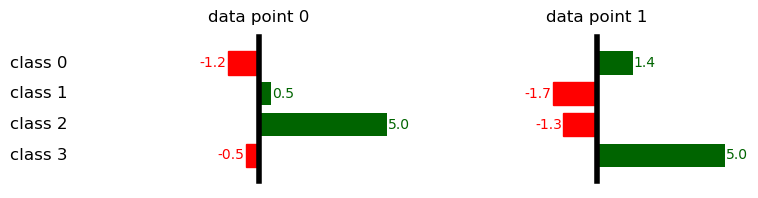

loss =  0.023508397862315178  good!


In [34]:
labels = torch.LongTensor([2,3])
scores = torch.Tensor([[-1.2, 0.5 , 5, -0.5], [1.4, -1.7 , -1.3, 5.0]])
utils.display_scores(scores)

criterion = nn.CrossEntropyLoss()
average_loss = criterion(scores, labels)
print('loss = ', average_loss.item(), " good!")

In [35]:
# Cross Entropy loss
p = torch.softmax(scores, dim=1)
log_prob = -torch.log(p)
print(log_prob)
print(log_prob[torch.arange(2),labels])

loss = log_prob[torch.arange(2),labels].mean()
print('loss = ', loss.item(), " good!")

tensor([[6.2171, 4.5171, 0.0171, 5.5171],
        [3.6299, 6.7299, 6.3299, 0.0299]])
tensor([0.0171, 0.0299])
loss =  0.023508373647928238  good!


In [36]:
criterion = nn.CrossEntropyLoss(weight=torch.Tensor([0, 1, 0.1, 0])) # i dun think is correct
weighted_loss = criterion(scores, labels)
print('weighted loss = ', weighted_loss.item(), " good!")

weighted loss =  0.017078476026654243  good!


In [37]:
# Weighted cross entropy
w = torch.zeros(2)
w[labels==2] = 1
w[labels==3] = 1/10
print(w)
print(w * log_prob[torch.arange(2),labels])

loss = (w * log_prob[torch.arange(2),labels]).mean() 
print('weighted loss = ', loss.item(), " good!")

tensor([1.0000, 0.1000])
tensor([0.0171, 0.0030])
weighted loss =  0.01003614068031311  good!


# 4. MLP + Full Training Loop (labs_lecture05)

## 4.1 Epoch
Shuffled Indices

In [38]:
bs = 2
shuffled_indices = torch.randperm(10) #len of train_data
for count in range(0,10,bs):
    batch_of_indices = shuffled_indices[count:count+bs]
    print(batch_of_indices)

tensor([2, 3])
tensor([9, 1])
tensor([0, 6])
tensor([5, 7])
tensor([8, 4])


## 4.2 Monitoring Loss
running_loss += loss.detach().item() \
error = utils.get_error(scores.detach(), minibatch_label) \
running_error += error.item()

total_loss = running_loss/num_batches \
total_error = running_error/num_batches 

## 4.3 Full Loop

In [39]:
class three_layer_net(nn.Module):

    def __init__(self, input_size, hidden_size1, hidden_size2,  output_size):
        super(three_layer_net , self).__init__()
        
        self.layer1 = nn.Linear(input_size, hidden_size1) 
        self.layer2 = nn.Linear(hidden_size1, hidden_size2) 
        self.layer3 = nn.Linear(hidden_size2, output_size) 
        
    def forward(self, x):
        
        y       = self.layer1(x) 
        y_hat   = F.relu(y) 
        z       = self.layer2(y_hat) 
        z_hat   = F.relu(z) 
        scores  = self.layer3(z_hat)
        
        return scores

In [40]:
import time
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
# device = torch.device("cpu")

cuda:0


In [41]:
net = three_layer_net(784, 200, 200, 10).to(device)
print(net)
utils.display_num_param(net)

three_layer_net(
  (layer1): Linear(in_features=784, out_features=200, bias=True)
  (layer2): Linear(in_features=200, out_features=200, bias=True)
  (layer3): Linear(in_features=200, out_features=10, bias=True)
)
There are 199210 (0.20 million) parameters in this neural network


In [42]:
def eval_on_test_set():
    running_error = 0
    num_batches = 0
    for i in range(0, len(test_data), bs):
        minibatch_data = test_data[i:i+bs].to(device)
        minibatch_label = test_label[i:i+bs].to(device)
        inputs = minibatch_data.view(bs, 784)
        scores = net(inputs)
        error = utils.get_error(scores, minibatch_label)
        running_error += error.detach().item()
        num_batches += 1
    total_error = running_error / num_batches
    print(f"=> test error: {total_error*100:5f} %")

In [43]:
criterion = nn.CrossEntropyLoss()
bs = 200
lr = 0.05 # initial learning rate

In [ ]:
start = time.time()
for epoch in range(200):
    # update learning rate based on lr strategy
    if epoch % 10 == 0 and epoch > 10: 
        lr = lr / 1.5 
    
    # reset optimizer with new learning rate
    optimizer = torch.optim.SGD(net.parameters(), lr=lr)
    
    running_loss = 0
    running_error = 0
    num_batches = 0
    
    shuffled_indices=torch.randperm(len(train_data)) # 60000
    
    for count in range(0, len(train_data), bs):
        # reset gradients
        optimizer.zero_grad() 
        # create minibatch
        indices = shuffled_indices[count:count+bs]
        minibatch_data = train_data[indices].to(device)   #[200, 28, 28]
        minibatch_label = train_label[indices].to(device) #[200]
        
        inputs = minibatch_data.view(bs, 784) # reshape to fit network #[200, 784]
        # Start tracking all operations that will be done on "inputs"
        inputs.requires_grad_()
        
        scores = net(inputs)
        
        loss = criterion(scores, minibatch_label) # compute CEL #[200, 10]
        loss.backward()  # compute gradients via backward pass
        optimizer.step() # update weights using SGD
        
        running_loss += loss.detach().item()
        error = utils.get_error(scores.detach(), minibatch_label)
        running_error += error.detach().item()
        num_batches += 1
    
    total_loss = running_loss/num_batches
    total_error = running_error/num_batches
    elapsed = time.time() - start
    
    if epoch % 10 == 0 : 
        print(' ') 
        print(f"epoch={epoch}, time={elapsed:5f}, loss={total_loss:5f}, error={total_error*100:5f}%, lr={lr:5f}")
        eval_on_test_set()
    

> <ipython-input-49-d6870499f295>(31)<module>()
     29 
     30         set_trace()
---> 31         loss = criterion(scores, minibatch_label) # compute CEL
     32         loss.backward()  # compute gradients via backward pass
     33         optimizer.step() # update weights using SGD



ipdb>  scores.shape


torch.Size([200, 10])


ipdb>  n


> <ipython-input-49-d6870499f295>(32)<module>()
     30         set_trace()
     31         loss = criterion(scores, minibatch_label) # compute CEL
---> 32         loss.backward()  # compute gradients via backward pass
     33         optimizer.step() # update weights using SGD
     34 



ipdb>  loss.shape


torch.Size([])


ipdb>  loss


tensor(0.0228, device='cuda:0', grad_fn=<NllLossBackward>)


ipdb>  minibatch_label.shape


torch.Size([200])


ipdb>  n


> <ipython-input-49-d6870499f295>(33)<module>()
     31         loss = criterion(scores, minibatch_label) # compute CEL
     32         loss.backward()  # compute gradients via backward pass
---> 33         optimizer.step() # update weights using SGD
     34 
     35         running_loss += loss.detach().item()



ipdb>  n


> <ipython-input-49-d6870499f295>(35)<module>()
     33         optimizer.step() # update weights using SGD
     34 
---> 35         running_loss += loss.detach().item()
     36         error = utils.get_error(scores.detach(), minibatch_label)
     37         running_error += error.detach().item()



ipdb>  n


> <ipython-input-49-d6870499f295>(36)<module>()
     34 
     35         running_loss += loss.detach().item()
---> 36         error = utils.get_error(scores.detach(), minibatch_label)
     37         running_error += error.detach().item()
     38         num_batches += 1



ipdb>  n


> <ipython-input-49-d6870499f295>(37)<module>()
     35         running_loss += loss.detach().item()
     36         error = utils.get_error(scores.detach(), minibatch_label)
---> 37         running_error += error.detach().item()
     38         num_batches += 1
     39 



ipdb>  n


> <ipython-input-49-d6870499f295>(38)<module>()
     36         error = utils.get_error(scores.detach(), minibatch_label)
     37         running_error += error.detach().item()
---> 38         num_batches += 1
     39 
     40     total_loss = running_loss/num_batches



ipdb>  n


> <ipython-input-49-d6870499f295>(16)<module>()
     14     shuffled_indices=torch.randperm(len(train_data)) # 60000
     15 
---> 16     for count in range(0, len(train_data), bs):
     17         # reset gradients
     18         optimizer.zero_grad()



ipdb>  n


> <ipython-input-49-d6870499f295>(18)<module>()
     16     for count in range(0, len(train_data), bs):
     17         # reset gradients
---> 18         optimizer.zero_grad()
     19         # create minibatch
     20         indices = shuffled_indices[count:count+bs]



ipdb>  n


> <ipython-input-49-d6870499f295>(20)<module>()
     18         optimizer.zero_grad()
     19         # create minibatch
---> 20         indices = shuffled_indices[count:count+bs]
     21         minibatch_data = train_data[indices].to(device)
     22         minibatch_label = train_label[indices].to(device)



ipdb>  n


> <ipython-input-49-d6870499f295>(21)<module>()
     19         # create minibatch
     20         indices = shuffled_indices[count:count+bs]
---> 21         minibatch_data = train_data[indices].to(device)
     22         minibatch_label = train_label[indices].to(device)
     23 



ipdb>  n


> <ipython-input-49-d6870499f295>(22)<module>()
     20         indices = shuffled_indices[count:count+bs]
     21         minibatch_data = train_data[indices].to(device)
---> 22         minibatch_label = train_label[indices].to(device)
     23 
     24         inputs = minibatch_data.view(bs, 784) # reshape to fit network



ipdb>  n


> <ipython-input-49-d6870499f295>(24)<module>()
     22         minibatch_label = train_label[indices].to(device)
     23 
---> 24         inputs = minibatch_data.view(bs, 784) # reshape to fit network
     25         # Start tracking all operations that will be done on "inputs"
     26         inputs.requires_grad_()



ipdb>  minibatch_data.shape


torch.Size([200, 28, 28])


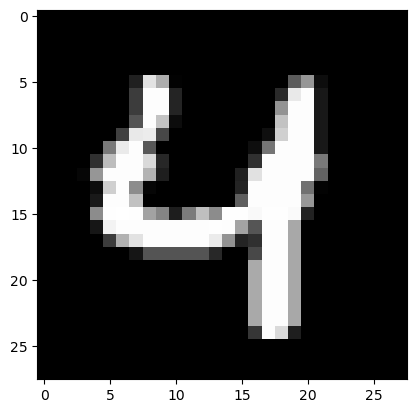

torch.Size([1, 10])


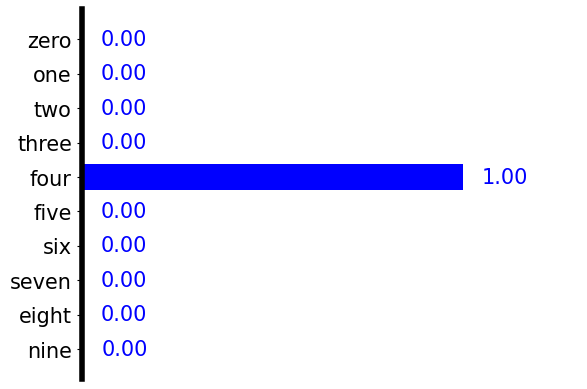

In [45]:
# choose a picture at random
idx = randint(0, 10000-1)
im = test_data[idx]

# diplay the picture
utils.show(im)

# feed it to the net and display the confidence scores
scores = net(im.view(1,784).to(device)) 
probs = F.softmax(scores, dim=1)
print(probs.shape)
utils.show_prob_mnist(probs.cpu())

In [46]:
# Computing inverse weights
weights = torch.tensor([9.8, 68.0, 5.3, 3.5, 10.8, 1.1, 1.4], dtype=torch.float32)
weights = weights / weights.sum()
print(weights)
weights = 1.0 / weights
weights = weights / weights.sum()
print(weights)
normedWeights = [1 - (x / sum(weights)) for x in weights]
normedWeights = torch.FloatTensor(normedWeights)
print(normedWeights)

tensor([0.0981, 0.6807, 0.0531, 0.0350, 0.1081, 0.0110, 0.0140])
tensor([0.0442, 0.0064, 0.0818, 0.1238, 0.0401, 0.3940, 0.3096])
tensor([0.9558, 0.9936, 0.9182, 0.8762, 0.9599, 0.6060, 0.6904])
